## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
## Delivery_time -> Predict delivery time using sorting time 
### (Use Dataset 'delivery_time')

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
del_time=pd.read_csv("C:\Vishal\ExcelR\Data Science\Assignments\delivery_time.csv")
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Performing Exploratory Data Analysis

In [3]:
del_time.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Feature Engineering - Renaming columns
del_time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1,inplace=True)

<AxesSubplot:>

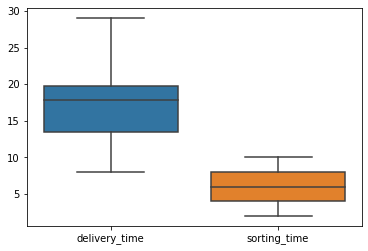

In [5]:
#Checking for outliers
sns.boxplot(data=del_time)
#No outliers detected

<AxesSubplot:>

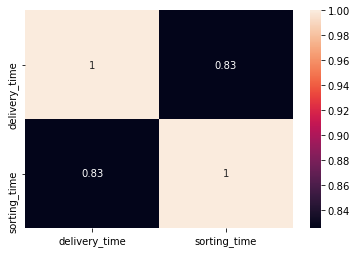

In [6]:
#Finding correlation using Heatmap
sns.heatmap(del_time.corr(),annot=True)
#We're having a good positive correlation of 0.98 between the variables

### Building the model

In [7]:
#Identifying Feature x and Target y and Initializing the Model
Regression_Model=sm.ols('delivery_time~sorting_time',data=del_time).fit()

In [8]:
#Calculating coefficient parameters
print(Regression_Model.params)

Intercept       6.582734
sorting_time    1.649020
dtype: float64


In [9]:
#Calculating t-values & p-values
print(Regression_Model.tvalues,'\n',Regression_Model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [10]:
print('r-squared value: ',Regression_Model.rsquared,'r-squared adjusted value: ',Regression_Model.rsquared_adj)

r-squared value:  0.6822714748417231 r-squared adjusted value:  0.6655489208860244


### Testing the model

In [11]:
#Making prediction using given data
#Comparing Actual and Predicted Delivery Time
del_time_act = pd.DataFrame(del_time.delivery_time)
del_time_pred = pd.DataFrame(Regression_Model.predict(),columns=['Predicted Delivery Time'])
pd.concat([del_time_act, del_time_pred], axis = 1)

,delivery_time,Predicted Delivery Time
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


Text(0, 0.5, 'Delivery Time')

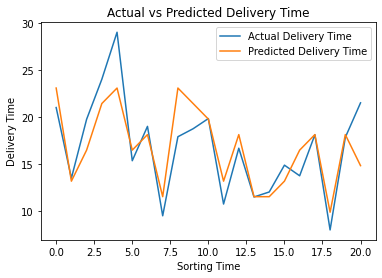

In [12]:
#Plotting graph of actual salary vs predicted salary
#plt.plot(del_time.sorting_time)
plt.plot(del_time_act)
plt.plot(del_time_pred)
plt.legend(['Actual Delivery Time','Predicted Delivery Time'])
plt.title("Actual vs Predicted Delivery Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

### Predicting Salary using Model!

In [12]:
## r-squared value is 0.68 hence model can be used for prediction!
x = (int(input("Enter the Sorting Time : ")))
np.asarray(x)
x = pd.DataFrame([x], columns = ['sorting_time'])
print('The expected Delivery Time is: ', Regression_Model.predict(x))

Enter the Sorting Time : 10
The expected Delivery Time is:  0    23.072933
dtype: float64
